# 使用 OpenAI 的开源 CLIP 模型（基于 Vision Transformer）和 ChromaDB 实现图像到图像搜索

#### 本教程演示了一个反向图像搜索或图像相似度搜索，使用输入图像和一些将被索引或嵌入到 ChromaDB 中的提供图像

##### 你可以在与图像相同的向量数据库空间中嵌入文本，并根据输入的文本或图像检索文本和图像。
##### 以下链接演示了这一点。
<a> https://python.langchain.com/v0.2/docs/integrations/text_embedding/open_clip/ </a>

## 安装和导入

In [ ]:
!pip install langchain_experimental

In [ ]:
!pip install langchain_chroma

In [2]:
import os

from PIL import Image
from tqdm import tqdm

### Langchain 导入

In [ ]:
# 导入 Chroma 类（以下任意一个都可以正常工作）
from langchain_chroma import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
# from langchain_community.vectorstores import Chroma

## 在列表中提供你的路径

#### 本教程使用来自 Myntra Kaggle 数据集的数据：- <a> https://www.kaggle.com/datasets/hiteshsuthar101/myntra-fashion-product-dataset </a>
#### 你可以直接下载图像或从 csv 中读取链接然后下载

In [4]:
all_image_uris = [
    "../../../py_ml_env/images_all/b0eb9426-adf2-4802-a6b3-5dbacbc5f2511643971561167KhushalKWomenBlackEthnicMotifsAngrakhaBeadsandStonesKurtawit7.jpg",
    "../../../py_ml_env/images_all/17ab2ac8-2e60-422d-9d20-2527415932361640754214931-STRAPPY-SET-IN-ORANGE-WITH-ORGANZA-DUPATTA-5961640754214349-2.jpg",
    "../../../py_ml_env/images_all/b8c4f90f-683c-48d2-b8ac-19891a87c0651638428628378KurtaSets1.jpg",
    "../../../py_ml_env/images_all/d2407657-1f04-4d13-9f52-9e134050489b1625905793495-Nayo-Women-Red-Ethnic-Motifs-Printed-Empire-Pure-Cotton-Kurt-1.jpg",
    "../../../py_ml_env/images_all/30b0017d-7e72-4d40-9633-ef78d01719741575541717470-AHIKA-Women-Black--Green-Printed-Straight-Kurta-990157554171-1.jpg",
    "../../../py_ml_env/images_all/507490f7-c8f9-492c-b3f8-c7e977d1af701654922515416SochWomenRedThreadWorkGeorgetteAnarkaliKurta1.jpg",
    "../../../py_ml_env/images_all/5fba9594-3301-4881-ba56-d56a44570e831654747998773LibasWomenNavyBluePureCottonFloralPrintKurtawithPalazzosDupa1.jpg",
    "../../../py_ml_env/images_all/e6b90907-a613-45e1-9b2e-988caaba36581645010770505-Ahalyaa-Women-Beige-Floral-Printed-Regular-Gotta-Patti-Kurta-1.jpg",
    "../../../py_ml_env/images_all/5ea707f4-8491-4d1c-b520-86a1cff4c86e1644841891629-Anouk-Women-Yellow--White-Printed-Kurta-with-Palazzos-706164-1.jpg",
    "../../../py_ml_env/images_all/11b842c5-d9d4-4fee-baa2-0972e3a673641643970773675KhushalKWomenGreenEthnicMotifsPrintedEmpireGottaPattiPureCot7.jpg",
    "../../../py_ml_env/images_all/b783aef9-c902-462e-af73-de159bfd011c1565256752191-Libas-Women-Kurta-Sets-2081565256750830-1.jpg",
    "../../../py_ml_env/images_all/bb925efb-80d9-4cb6-838c-df86f1ba3c3e1637570416652-Varanga-Women-Mustard-Yellow-Floral-Yoke-Embroidered-Straigh-1.jpg",
    "../../../py_ml_env/images_all/7d7656e5-e37d-4f61-9407-98bd341ca8f91640261029836KurtaSets1.jpg",
    "../../../py_ml_env/images_all/43d65352-9853-498e-95a4-be514df0be901559294212152-Vishudh--Straight-Kurta-With-Crop-Palazzo-7041559294209627-1.jpg",
    "../../../py_ml_env/images_all/4a37718e-8942-479c-a7ea-0b074d53ee4b1650456566424AnoukWomenPeach-ColouredYokeDesignMirror-WorkKurtawithTrouse1.jpg",
    "../../../py_ml_env/images_all/5910af54-3435-40d5-95d4-0ac2daf797f51658319613886-SheWill-Women-Maroon-Ethnic-Yoke-Design-Embroided-Kurta-with-1.jpg",
    "../../../py_ml_env/images_all/d57adb8b-e792-477a-8801-6ea570cd88ef1629800170287VarangaWomenYellowFloralPrintedKeyholeNeckThreadWorkKurta1.jpg",
    "../../../py_ml_env/images_all/c35d059d-a357-4863-bcb1-eacd8c988fb01572422803188-AHIKA-Women-Kurtas-8841572422802083-1.jpg",
    "../../../py_ml_env/images_all/3a61f2ab-7905-4efc-84e8-df1f74fa08201623409397327-Anouk-Women-Kurtas-1031623409396642-1.jpg",
    "../../../py_ml_env/images_all/3e9c355b-20e6-42d0-8480-7046979f87711658733247220CharuWomenNavyBlueStripedThreadWorkKurta1.jpg",
    "../../../py_ml_env/images_all/0d391a8b-ea8c-4258-86d5-a99b9f3f34201630040200642-Libas-Women-Kurta-Sets-5941630040199555-1.jpg",
    "../../../py_ml_env/images_all/d6b74d2b-825f-4b34-af01-9d6336045bdb1624612149604-1.jpg",
    "../../../py_ml_env/images_all/07adcdf7-eee1-4077-b55c-f6608caaa6f01647663614971KALINIWomenSeaGreenFloralYokeDesignPleatedPureCottonTopwithS4.jpg",
    "../../../py_ml_env/images_all/6bc412bb-3cc6-4def-8833-f5580b0cc06a1617706648250-Indo-Era-Green-Printed-Straight-Kurta-Palazzo-With-Dupatta-S-1.jpg",
    "../../../py_ml_env/images_all/b1bd0687-7533-428d-8258-d29c793fc4541631092430795-Anouk-Women-Kurta-Sets-941631092429795-1.jpg",
    "../../../py_ml_env/images_all/64e975d5-dbda-4c09-87c0-c5152f9e82c71658736715566TOULINWomenTealFloralAngrakhaKurtiwithPalazzosWithDupatta1.jpg",
    "../../../py_ml_env/images_all/d1a4cc48-ff90-47ab-ad36-800743e83d641605767381033-Ishin-Womens-Rayon-Red-Bandhani-Print-Embellished-Anarkali-K-1.jpg",
]

## （可选）准备要与图像一起索引的元数据

In [5]:
metadatas = []
for idx, img in enumerate(all_image_uris):
    meta_dict = {}
    meta_dict["path"] = img
    meta_dict["id"] = idx
    metadatas.append(meta_dict)
print(metadatas[:5])

[{'path': '../../../py_ml_env/images_all/b0eb9426-adf2-4802-a6b3-5dbacbc5f2511643971561167KhushalKWomenBlackEthnicMotifsAngrakhaBeadsandStonesKurtawit7.jpg', 'id': 0}, {'path': '../../../py_ml_env/images_all/17ab2ac8-2e60-422d-9d20-2527415932361640754214931-STRAPPY-SET-IN-ORANGE-WITH-ORGANZA-DUPATTA-5961640754214349-2.jpg', 'id': 1}, {'path': '../../../py_ml_env/images_all/b8c4f90f-683c-48d2-b8ac-19891a87c0651638428628378KurtaSets1.jpg', 'id': 2}, {'path': '../../../py_ml_env/images_all/d2407657-1f04-4d13-9f52-9e134050489b1625905793495-Nayo-Women-Red-Ethnic-Motifs-Printed-Empire-Pure-Cotton-Kurt-1.jpg', 'id': 3}, {'path': '../../../py_ml_env/images_all/30b0017d-7e72-4d40-9633-ef78d01719741575541717470-AHIKA-Women-Black--Green-Printed-Straight-Kurta-990157554171-1.jpg', 'id': 4}]


## 初始化 OpenAI CLIP 模型

In [ ]:
# 你可以使用其他模型，如 Vit G 14、Vit H 14、Vit B32 等
# Vit-L-14 - 更大，但性能更好
# ViT-B-32 - 更小，性能较低的模型

# model_name = "ViT-L-14"
# checkpoint = "laion2b_s32b_b82k"

# 取消注释以下内容以使用该模型
model_name = "ViT-B-32"
checkpoint = "laion2b_s34b_b79k"

clip_embd = OpenCLIPEmbeddings(model_name=model_name, checkpoint=checkpoint)

### 图像样本测试

In [ ]:
# 嵌入图像
img_feat_1 = clip_embd.embed_image([all_image_uris[0]])

### 嵌入维度

In [8]:
len(img_feat_1[0])

512

### 初始化 Chroma 客户端，如果你想将向量数据库保存到磁盘并使用相同的代码和路径重新加载它，则 persist_directory 是可选的

In [9]:
collection_name = "chroma_img_collection_1"
chroma_client = Chroma(
    collection_name=collection_name,
    embedding_function=clip_embd,
    persist_directory="./indexed_db",
)

In [ ]:
def embed_images(chroma_client, uris, metadatas=[]):
    """
    将图像添加到 Chroma 客户端的函数，带有进度条。

    参数：
        chroma_client：Chroma 客户端对象。
        uris (List[str])：图像文件路径列表。
        metadatas (List[dict])：元数据字典列表。
    """
    # 使用进度条遍历 uris
    success_count = 0
    for i in tqdm(range(len(uris)), desc="正在添加图像"):
        uri = uris[i]
        metadata = metadatas[i]

        try:
            chroma_client.add_images(uris=[uri], metadatas=[metadata])
        except Exception as e:
            print(f"无法添加图像 {uri} 及其元数据 {metadata}。错误：{e}")
        else:
            success_count += 1

    return success_count

### 在此 embed_images 函数调用中指定你的图像路径列表

In [ ]:
success_count = embed_images(chroma_client, uris=all_image_uris, metadatas=metadatas)
if success_count:
    print(f"{success_count} 张图像已成功嵌入")
else:
    print("没有嵌入任何图像")

Adding images: 100%|████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.43it/s]

27 Images Embedded Successfully


## 用于绘制检索到的相似图像的辅助函数

In [ ]:
import math

import matplotlib.pyplot as plt


def plot_images_by_side(image_data):
    num_images = len(image_data)
    n_col = 2  # 固定列数
    n_row = math.ceil(num_images / n_col)  # 计算行数

    # 减小每个图形的大小
    fig, axs = plt.subplots(n_row, n_col, figsize=(10, 5 * n_row))
    axs = axs.flatten()

    for idx, data in enumerate(image_data):
        img_path = data["path"]
        score = round(data.get("score", 0), 2)
        img = Image.open(img_path)
        ax = axs[idx]
        ax.imshow(img)
        ax.title.set_text(f"\n商品 ID：{data["id"]}\n相似度得分：{score}")
        ax.axis("off")  # 关闭坐标轴

    # 隐藏剩余的空白子图
    for i in range(num_images, n_row * n_col):
        axs[i].axis("off")

    plt.tight_layout()
    plt.show()

## 接收输入图像路径，调整图像大小并显示

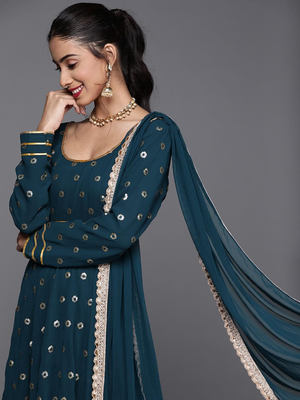

In [ ]:
search_img_path = "../../../py_ml_env/images_all/0d391a8b-ea8c-4258-86d5-a99b9f3f34201630040200642-Libas-Women-Kurta-Sets-5941630040199555-1.jpg"

my_image = Image.open(search_img_path).convert("RGB")
# 调整图像大小，同时保持宽高比
max_width = 400
max_height = 400

width, height = my_image.size
aspect_ratio = width / height

if width > height:
    new_width = min(width, max_width)
    new_height = int(new_width / aspect_ratio)
else:
    new_height = min(height, max_height)
    new_width = int(new_height * aspect_ratio)

my_image_resized = my_image.resize((new_width, new_height), Image.LANCZOS)

# 显示调整大小后的图像
my_image_resized

## 执行图像相似度搜索，获取 K 个检索到的图像的元数据，然后显示相似图像

### 我们只嵌入了有限的数据，我们可以嵌入大量具有相似图像的数据，以获得更好的结果

In [ ]:
k = 10

## 这将返回一个 Langchain 文档对象的列表，其中 page_content 是 base64 编码的图像
## 此方法使用元数据中的路径来显示图像
## 我们也可以在解码后使用该 base64 编码的图像

similar_images = chroma_client.similarity_search_by_image(uri=search_img_path, k=k)

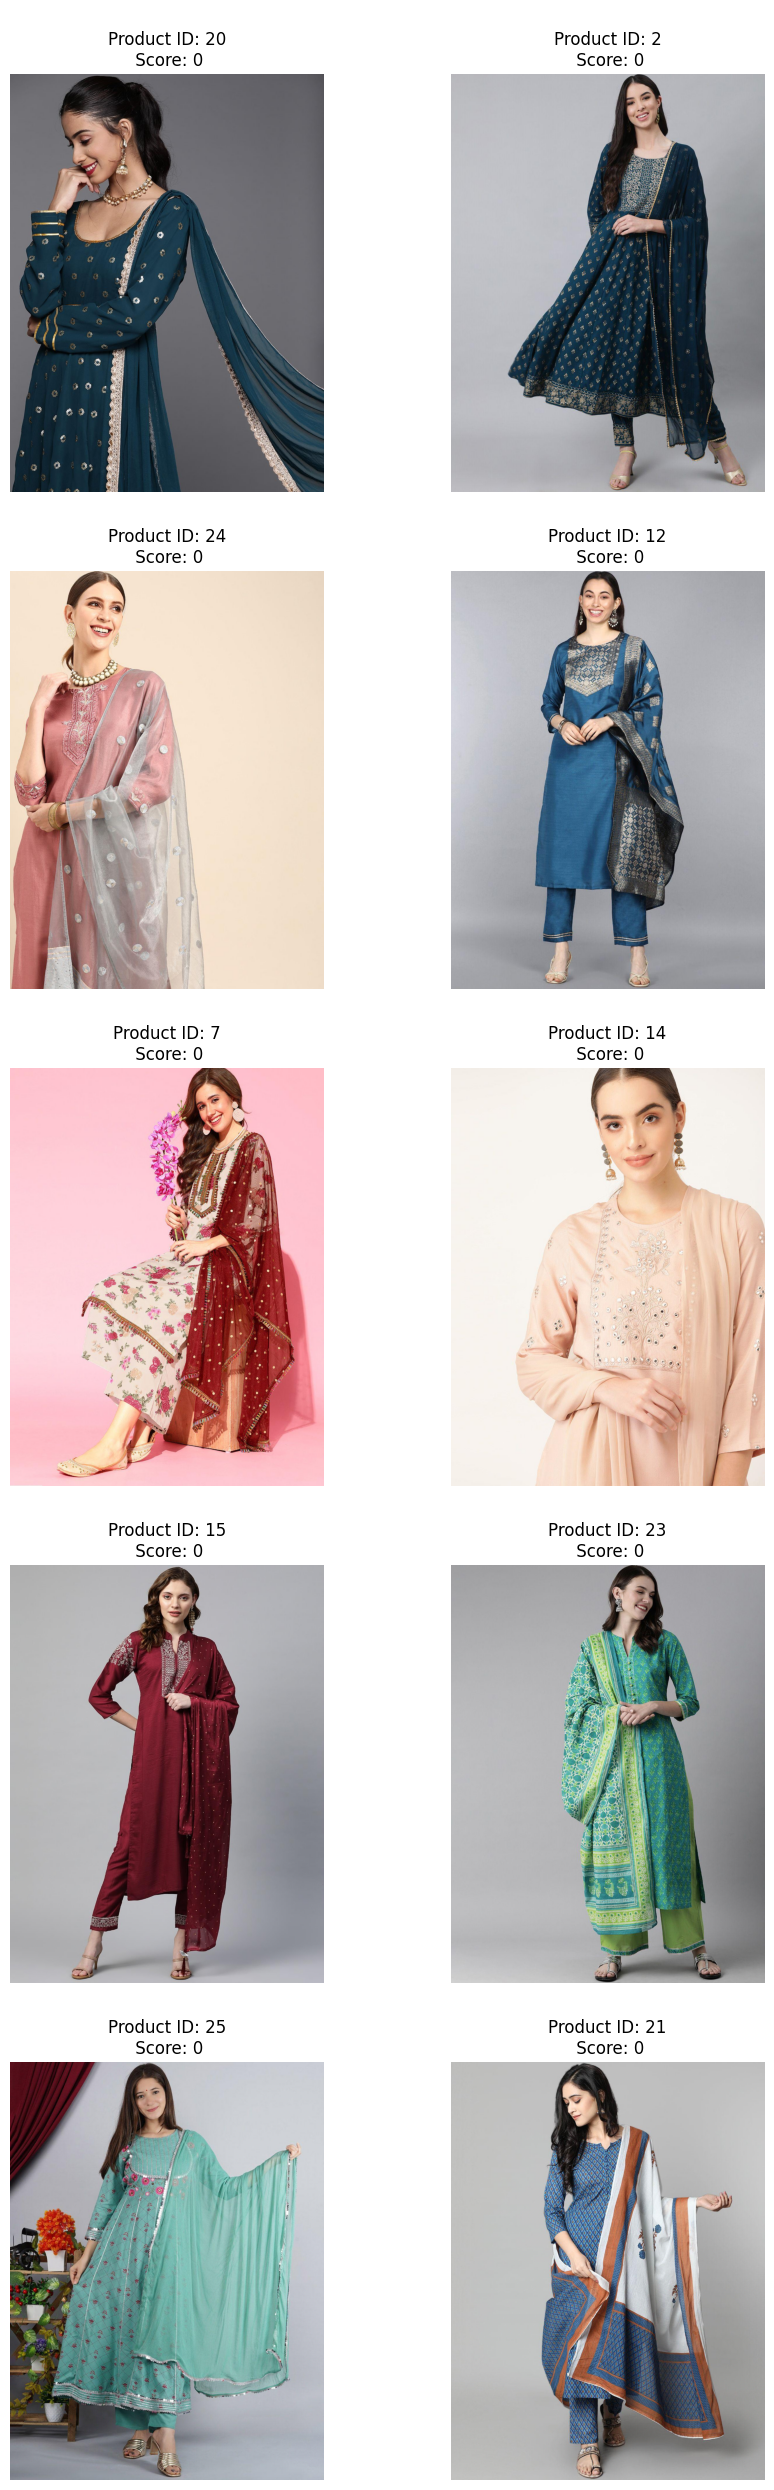

In [ ]:
similar_image_data_1 = []
for img in similar_images:
    # 从文档对象中获取元数据
    similar_image_data_1.append(img.metadata)
plot_images_by_side(similar_image_data_1)

## 使用相似度得分执行图像相似度搜索：
 我们得到一个包含 K 个元组的列表，格式如下：
 [
    (Langchain文档对象, 相似度得分),
    (Langchain文档对象, 相似度得分),
    (Langchain文档对象, 相似度得分)
   ]

In [16]:
similar_images = chroma_client.similarity_search_by_image_with_relevance_score(
    uri=search_img_path, k=k
)

In [ ]:
similar_image_data_2 = []
for img in similar_images:
    # 从文档对象中获取元数据
    meta_dict = img[0].metadata
    # 添加相似度得分
    meta_dict["score"] = img[1]
    similar_image_data_2.append(meta_dict)

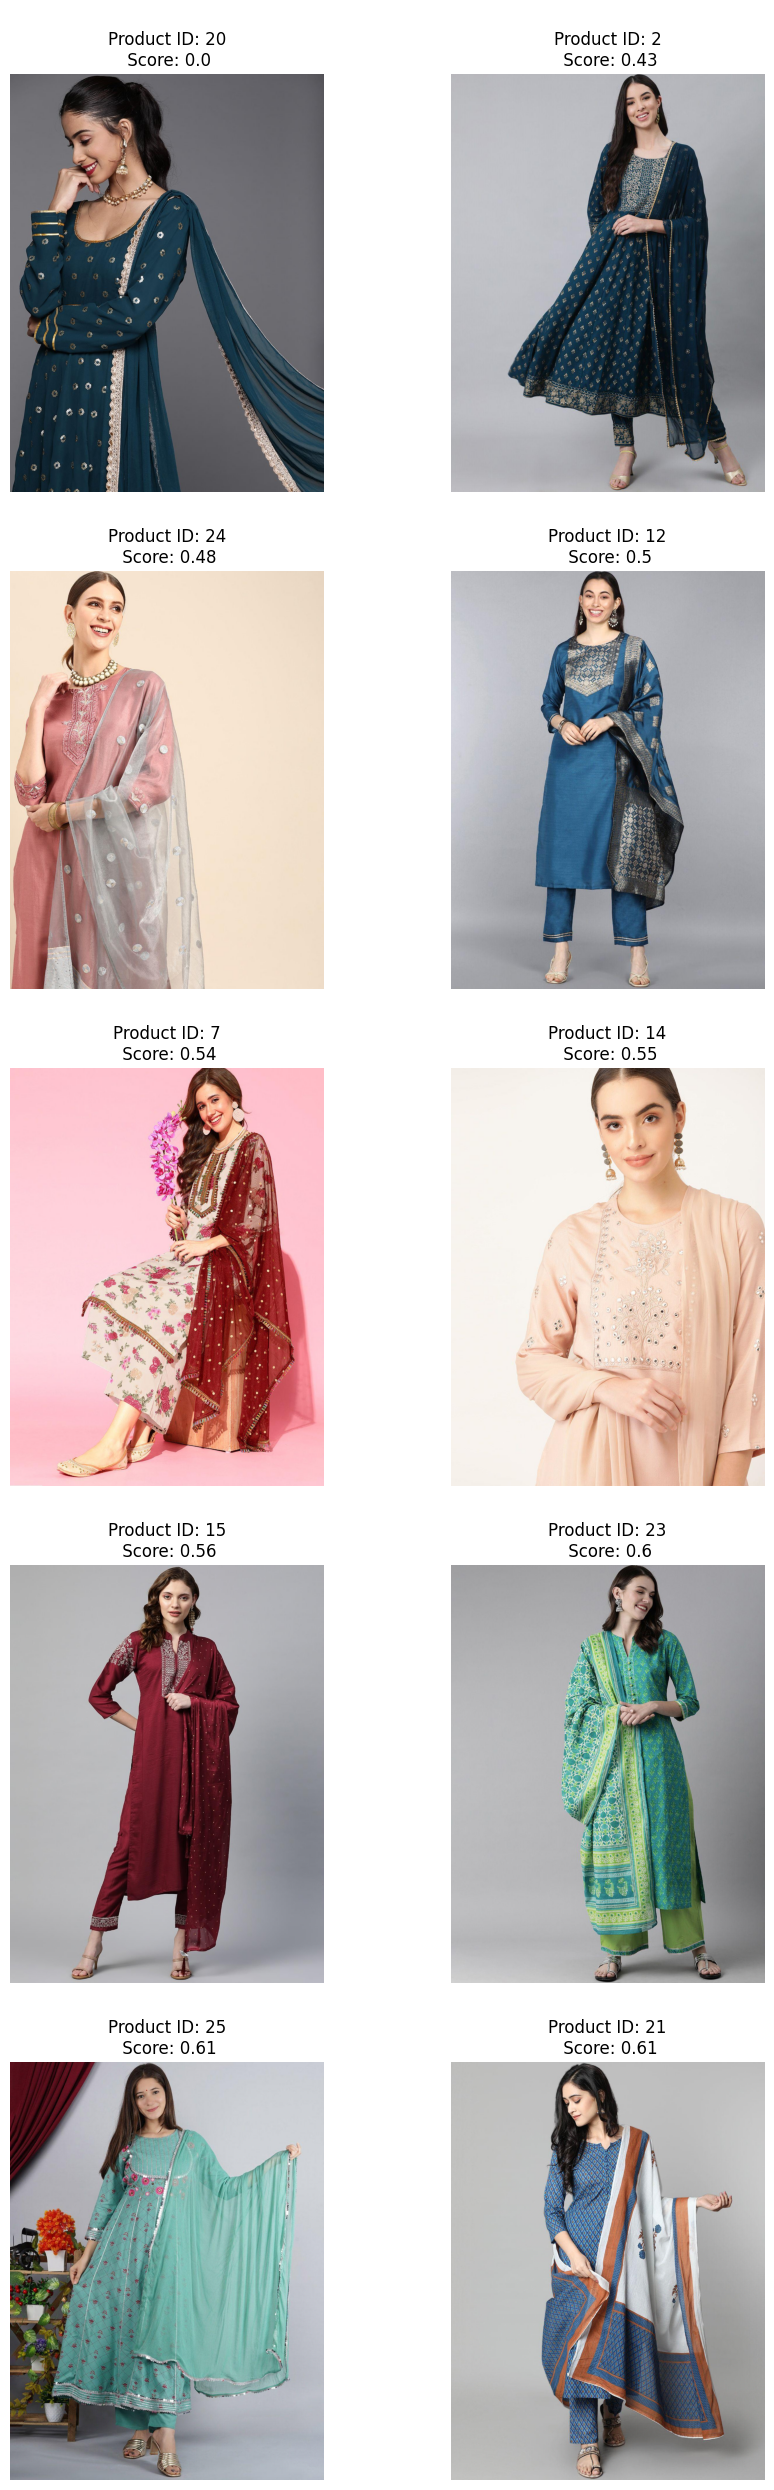

In [21]:
plot_images_by_side(similar_image_data_2)

## 我们已经成功使用 CLIP 和 ChromaDB 实现了图像到图像的搜索！